In [1]:
import csv
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import svm

#df = pd.read_csv('D:\OneDrive\\4.semester\OZNAL\Train_without_description.csv')
#df_contract_types = pd.read_csv('D:\OneDrive\\4.semester\OZNAL\Train_contract_types_added.csv')
#df_education = pd.read_csv('D:\OneDrive\\4.semester\OZNAL\Train_education_added.csv')
df_ed = pd.read_csv('D:\OneDrive\\4.semester\OZNAL\Train.csv')

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


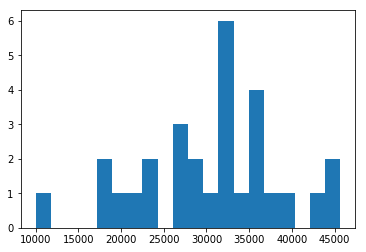

In [2]:
categories = {}
platy = collections.OrderedDict()

i=0
with open('D:\OneDrive\\4.semester\OZNAL\Train_rev1.csv', 'rb') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
     for row in spamreader:
        if i != 0 :
            if row[8] not in categories:
                categories[row[8]] = []
                categories[row[8]].append(int(row[10]))
            else:
                categories[row[8]].append(int(row[10]))
        else:
            i = 1

     for cat in categories:
        platy[cat] = sum(categories[cat])/ float(len(categories[cat]))

     plt.hist(platy.values(),bins=20)
     plt.show()

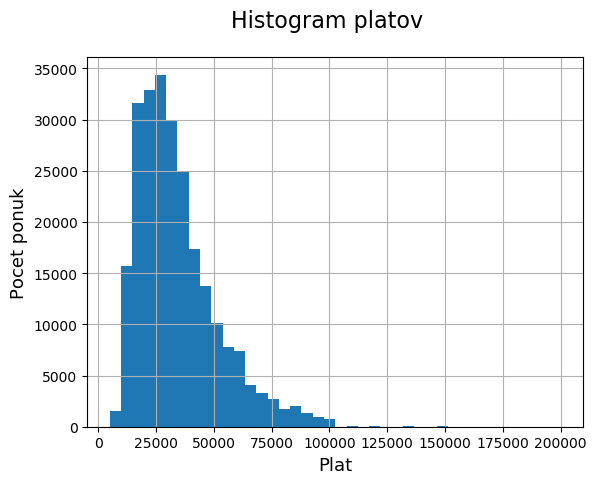

In [29]:
#sns.distplot(df['SalaryNormalized'])
plt.rcParams.update(plt.rcParamsDefault)
plt.hist(df['SalaryNormalized'],bins=40)
plt.suptitle('Histogram platov', fontsize=16)
plt.xlabel('Plat', fontsize=13)
plt.ylabel('Pocet ponuk', fontsize=13)
plt.grid(True)
plt.show()

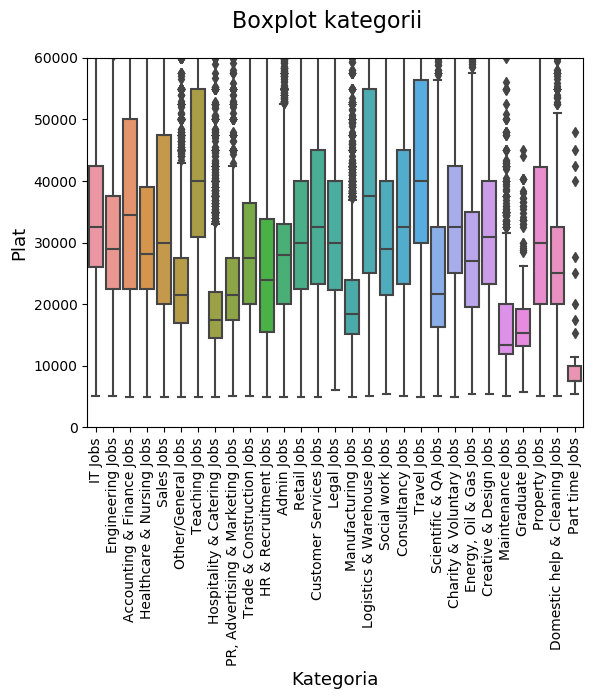

In [30]:
plt.rcParams.update(plt.rcParamsDefault)
plt.ylim(0, 60000)
plt.suptitle('Category boxplot', fontsize=16)
g = sns.boxplot(x=df['Category'], y=df['SalaryNormalized'])
g.set_xticklabels(labels = df['Category'].value_counts().index.tolist(),rotation=90)
plt.suptitle('Boxplot kategorii', fontsize=16)
plt.xlabel('Kategoria', fontsize=13)
plt.ylabel('Plat', fontsize=13)
plt.show()

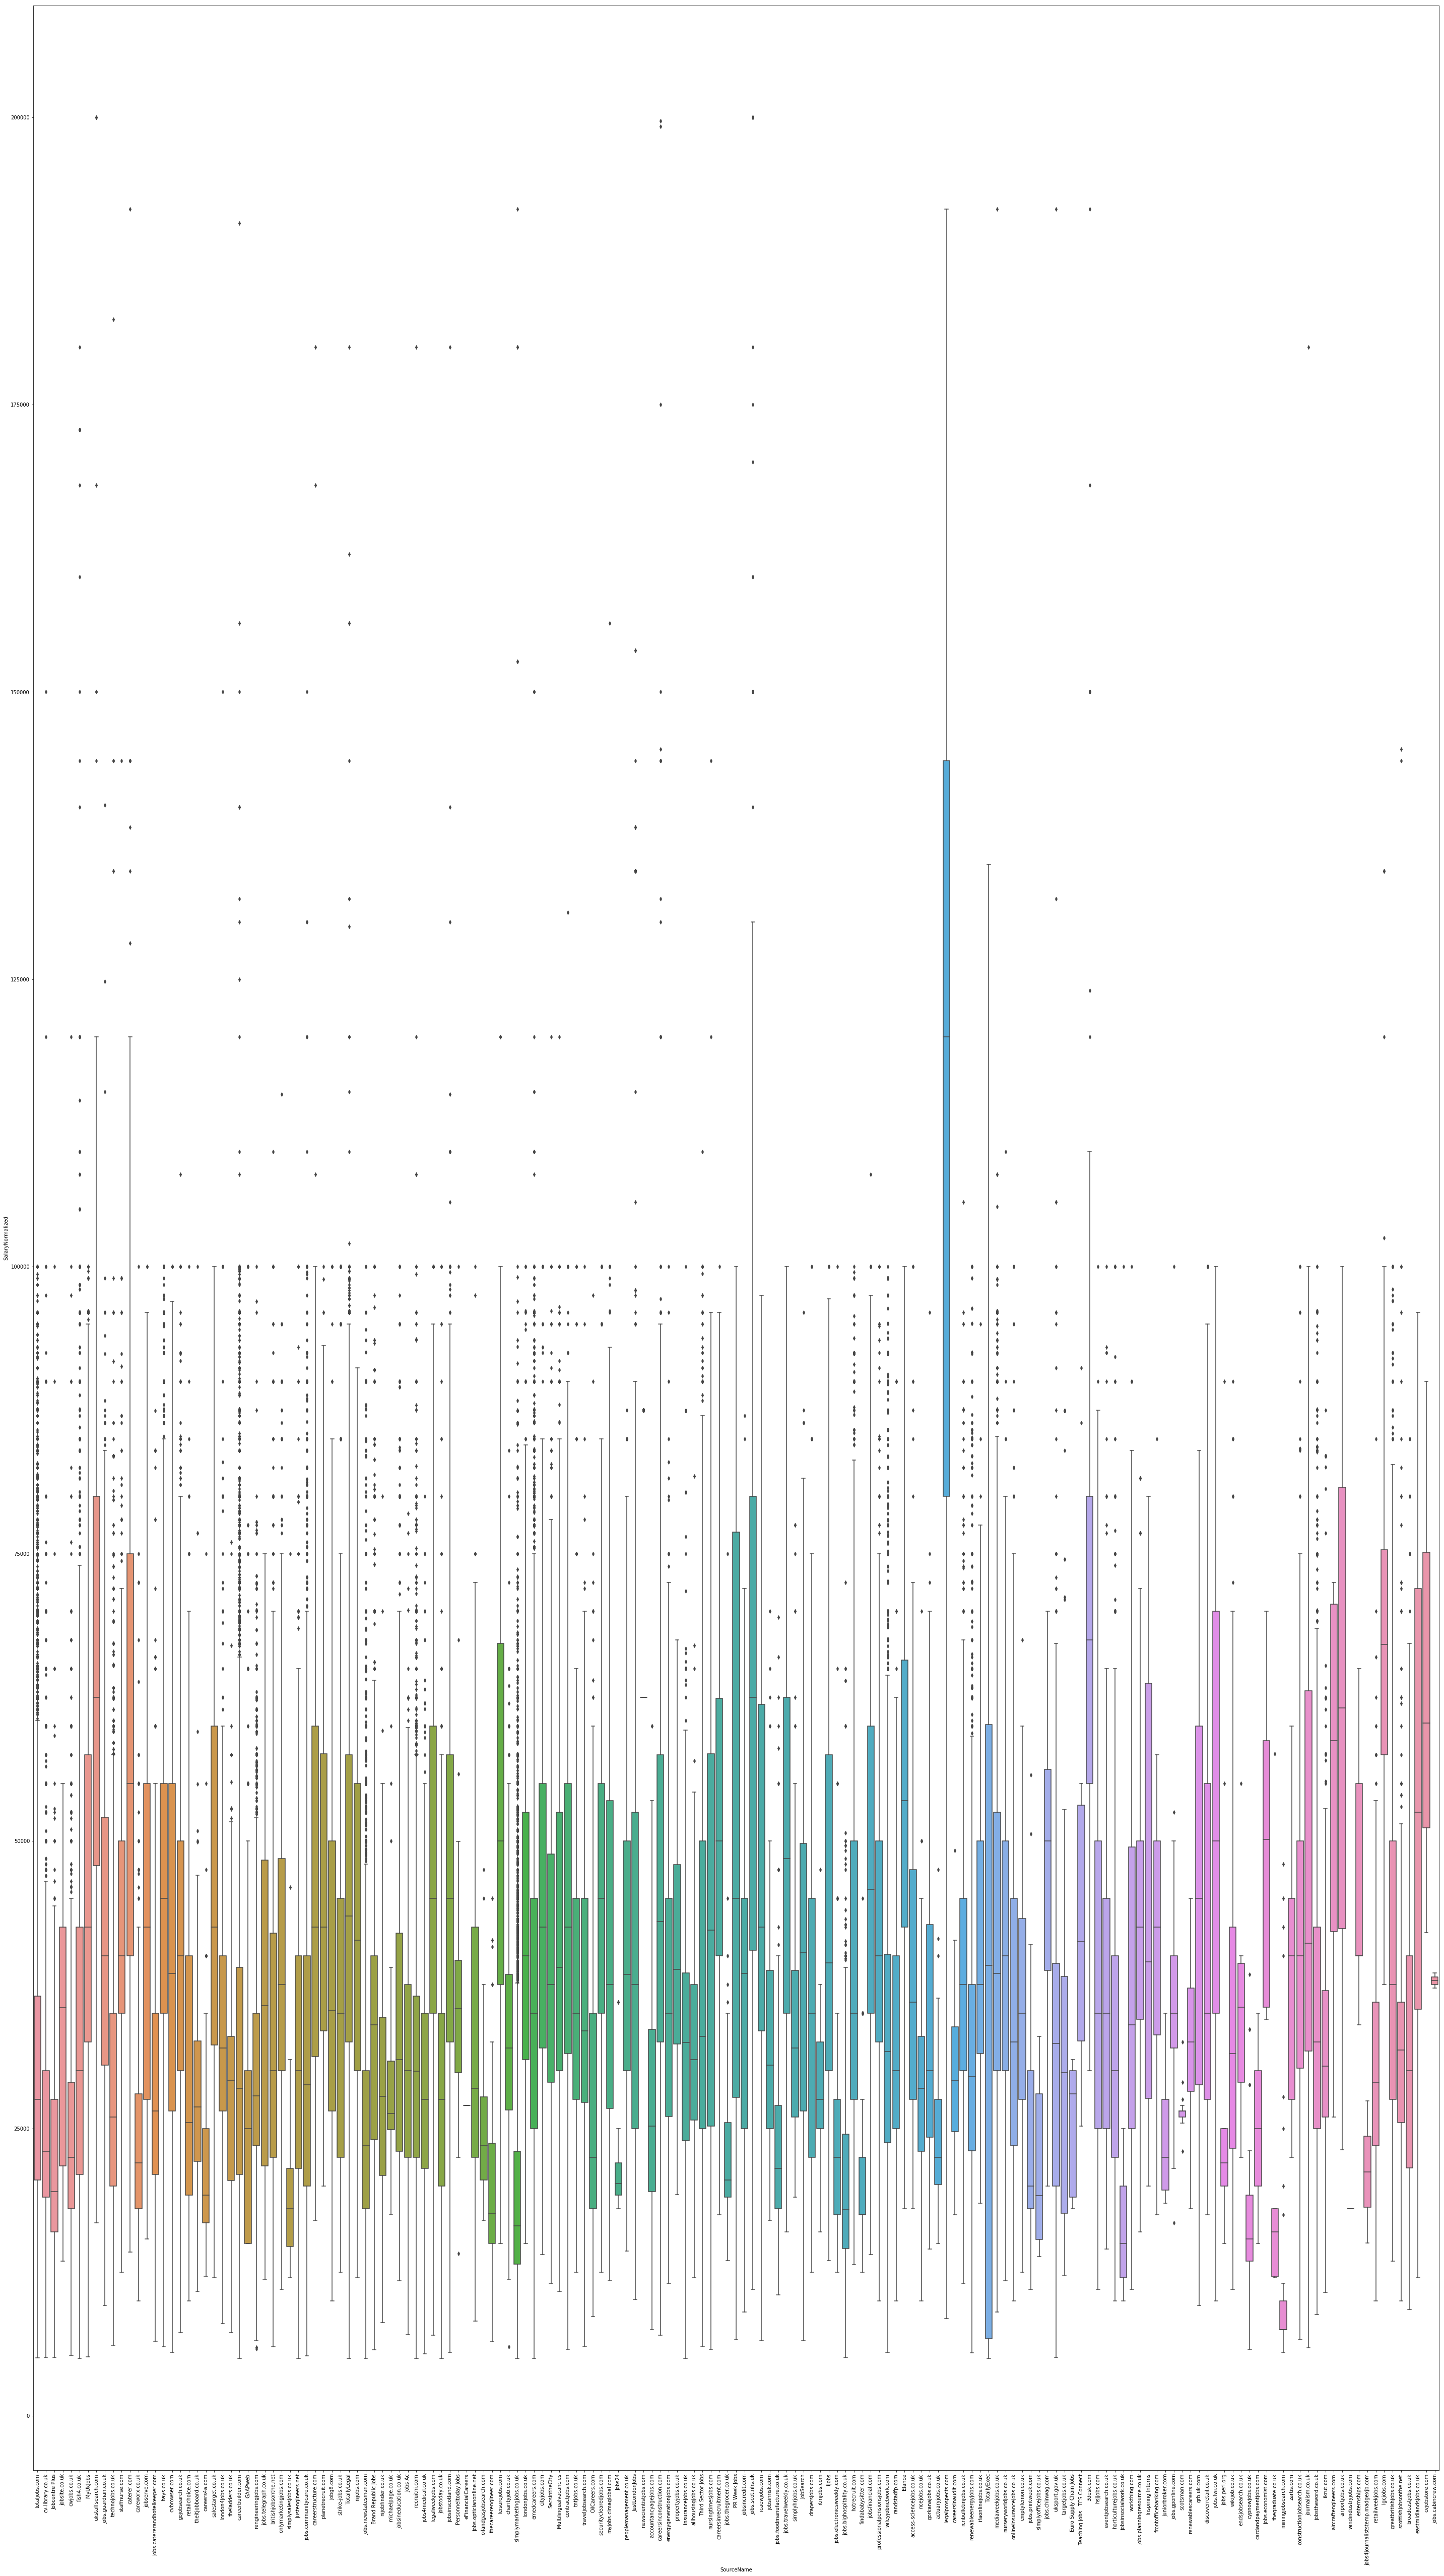

In [2]:
plt.rcParams["figure.figsize"] = [50,90]
g = sns.boxplot(x=df['SourceName'], y=df['SalaryNormalized'])
g.set_xticklabels(labels = df['SourceName'].value_counts().index.tolist(),rotation=90)
plt.show()

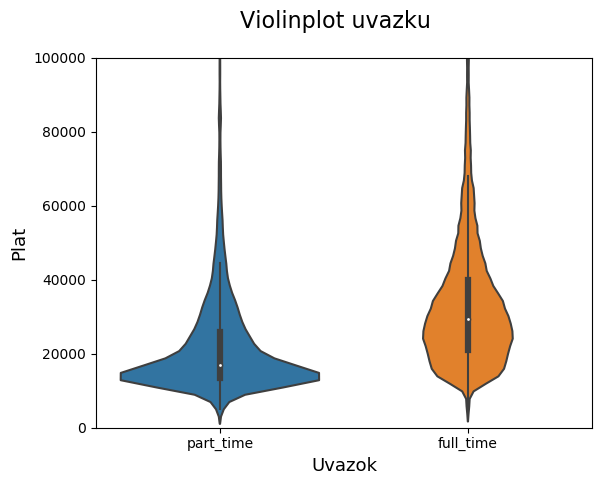

In [31]:
plt.rcParams.update(plt.rcParamsDefault)
sns.violinplot(x=df_contract_types['ContractType'], y=df_contract_types['SalaryNormalized'])
plt.ylim(0, 100000)
plt.suptitle('Violinplot uvazku', fontsize=16)
plt.xlabel('Uvazok', fontsize=13)
plt.ylabel('Plat', fontsize=13)
plt.show()

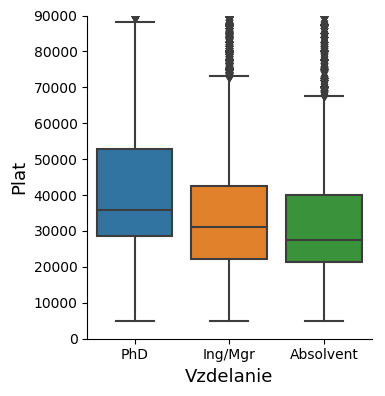

In [30]:
plt.rcParams.update(plt.rcParamsDefault)

# sns.violinplot(x=df_education['Doctorate'], y=df_education['SalaryNormalized'])
# sns.violinplot(x=df_education['Masters'], y=df_education['SalaryNormalized'])
# sns.violinplot(x=df_education['Graduate'], y=df_education['SalaryNormalized'])

#sns.boxplot(df_education[['Doctorate','Masters', 'Graduate']], groupby=df_education['SalaryNormalized'])

df_long = pd.melt(df_education, "SalaryNormalized", var_name="Vzdelanie", value_name="Value")
sns.factorplot("Vzdelanie", y="SalaryNormalized", data=df_long[df_long.Value != 0], kind="box")
plt.ylim(0, 90000)
plt.ylabel('Plat', fontsize=13)
plt.xlabel('Vzdelanie', fontsize=13)
xticks = ["PhD","Ing./Mgr.","Absolvent"]
plt.show()

In [2]:
df_x=df_education.iloc[:,0:3]
df_y=df_education.iloc[:,3]
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

NameError: name 'df_education' is not defined

In [19]:
rf=RandomForestClassifier(n_estimators=10,max_depth=5)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [189]:
start = 0
diff = 0
base = 1000

t = y_test.values
print len(x_test)

for i in range (1,len(x_test)/base):
    print i
    if start+base < len(x_test):
        prediction = rf.predict(x_test[start:start+base])
    else:
        prediction = rf.predict(x_test[start:len(x_test)])
        
    for i in range(len(prediction)):
        diff = diff + abs(prediction[i] - t[i+start])
    start = start + base
        
print diff/float((len(x_test)))

48954
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
13362.4069126


In [2]:
df_ed = pd.get_dummies(df_ed)
cols = list(df_ed.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('SalaryNormalized')) #Remove b from list
df_ed = df_ed[cols+['SalaryNormalized']] #Create new dataframe with columns in the order you want

df_x=df_ed.iloc[:,0:14]
df_y=df_ed.iloc[:,14]
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [3]:
rf=RandomForestClassifier(n_estimators=5,max_depth=8)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
start = 0
diff = 0
base = 1000

t = y_test.values
print len(x_test)

for i in range (1,len(x_test)/base):
    print i
    if start+base < len(x_test):
        prediction = rf.predict(x_test[start:start+base])
    else:
        prediction = rf.predict(x_test[start:len(x_test)])
        
    for i in range(len(prediction)):
        diff = diff + abs(prediction[i] - t[i+start])
    start = start + base
        
print diff/float((len(x_test)))

48954
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
4634.43863627
